<h2> Machine Learning for Predictive Pricing (Predicting House Prices) </h2>
<br> 
<br> 

**This project utilizes machine learning algorithms to predict house prices based on a pool of characteristics, ranging from the house square footage, to number of bathrooms, to how the house was graded by the relevant authorities. It was originally completed as part of the final project for my course, 'Data Analysis with Python', offered online by IBM, howeve I expanded upon it to showcase more skills and techniques learnt through the course and make it wider in scope.**

<br>

**The dataset being used here was taken from Kaggle.com, a popular website for finding and publishing dataset. You can quickly access it by clicking [here](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It presents house sales in Seattle-King County made between May 2014 to May 2015, and consisting of different house characteristics and the corresponding sale price for each house.** <br> 
<br>
**You can view each coloumn and its description in the table below:** <br>

| **Variable**      | **Description**                                                                                         |
| :-----------------| :------------------------------------------------------------------------------------------------------ |
| **id**            | Unique ID for each house sold                                                                           |
| **date**          | Date of the house sale                                                                                  |
| **price**         | Price of each house sold                                                                                |
| **bedrooms**      | Number of bedrooms                                                                                      |
| **bathrooms**     | Number of bathrooms                                                                                     |
| **sqft_living**   | Square footage of the house interior living space                                                       |
| **sqft_lot**      | Square footage of the lot (land space)                                                                  |
| **floors**        | Number of house floors                                                                                  |
| **waterfront**    | Whether a house is overlooking a waterfront (1) or not (0)                                              |
| **view**          | Rating of how good the house view is                                                                    |
| **condition**     | Rating of the overall house condition                                                                   |
| **grade**         | Overall grade given to the housing unit, based on King County grading system                            |
| **sqft_above**    | Square footage of the interior housing space that is above ground level                                 |
| **sqft_basement** | Square footage of the interior housing space that is below ground level                                 |
| **yr_built**      | Year the house was built                                                                                |
| **yr_renovated**  | Year when house was last renovated                                                                      |
| **zipcode**       | Zip code                                                                                                |
| **lat**           | Latitude coordinate                                                                                     |
| **long**          | Longitude coordinate                                                                                    |
| **sqft_living15** | Square footage of the interior housing living space for the closest 15 houses                           |
| **sqft_lot15**    | Square footage of the lot (land space) for the closest 15 houses                                        |

<br>
<br>


**To build a machine learning model that can predict house prices, the house attributes that are most associated with price are identified, prepared and preprocessed, and finally used to train the model. More specifically, different models are developed with the data, trained, evaluated, and improved, before selecting the model that best accounts for the data, and therefore proves to be the best at producing valid and reliable price predictions. Each model is tested and verified through in-sample evaluation metrics to evaluate the model's performance in reference to the data fed to it, out-of-sample evaluations to estimate how the model is likely to perform in the real world, with novel datasets, and through visualizations to compare the distributions of the predicted prices to the actual prices in the dataset. Finally, the best model is selected and used to generate predictions.** <br>

<br>

**Overall, the project is broken down into five parts: <br>
&emsp; 1) Loading, Inspecting, and Cleaning the Data <br>
&emsp; 2) Data Preparation and Preprocessing <br>
&emsp; 3) Model Development and Evaluation <br>
&emsp; 4) Hyperparameter Tuning <br>
&emsp; 5) Model Prediction** <br>

<br>

**The aim of this project is to demonstrate my abilities and coding skills to build, evaluate, and deploy machine learning models for tasks such as predictive pricing.**
<br>
<br>


In [ ]:
#If you're using the executable notebook version, please run this cell first 
#to install the necessary Python libraries for the task 
!pip install numpy 
!pip install pandas 
!pip install matplotlib 
!pip install seaborn 
!pip install scikit-learn
!pip install scikit-learn-intelex       

In [2]:
#Enabling Intel's support for scikit-learn to speed up machine learning algorithms 
from sklearnex import patch_sklearn
patch_sklearn()
import warnings
warnings.simplefilter("ignore")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
#Importing the modules for use 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

#Adjusting data display options 
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Part One: Loading, Inspecting, and Cleaning the Data


**1. Loading and reading the dataset**

In [4]:
#Accessing the file 
df = pd.read_excel("House Sales in King County.xlsx")

#Previewing the first 10 enteries off the dataset 
df.head(10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.000,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.000,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.000,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.000,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.000,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4.000,4.500,5420,101930,1.000,0,0,3,11,3890,1530,2001,0,98053,47.656,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3.000,2.250,1715,6819,2.000,0,0,3,7,1715,0,1995,0,98003,47.310,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3.000,1.500,1060,9711,1.000,0,0,3,7,1060,0,1963,0,98198,47.410,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3.000,1.000,1780,7470,1.000,0,0,3,7,1050,730,1960,0,98146,47.512,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3.000,2.500,1890,6560,2.000,0,0,3,7,1890,0,2003,0,98038,47.368,-122.031,2390,7570


**2. Inspecting the Data**


In [5]:
shape = df.shape
print('Number of coloumns:', shape[1])
print('Number of rows:', shape[0])


Number of coloumns: 21
Number of rows: 21613


In [6]:
#Inspecting the coloumn headers, data type, and entries count 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21600 non-null  float64
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
#Get statistical summary of the dataset 
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21600.000,21603.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.373,2.116,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.927,0.769,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,1.000,0.500,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

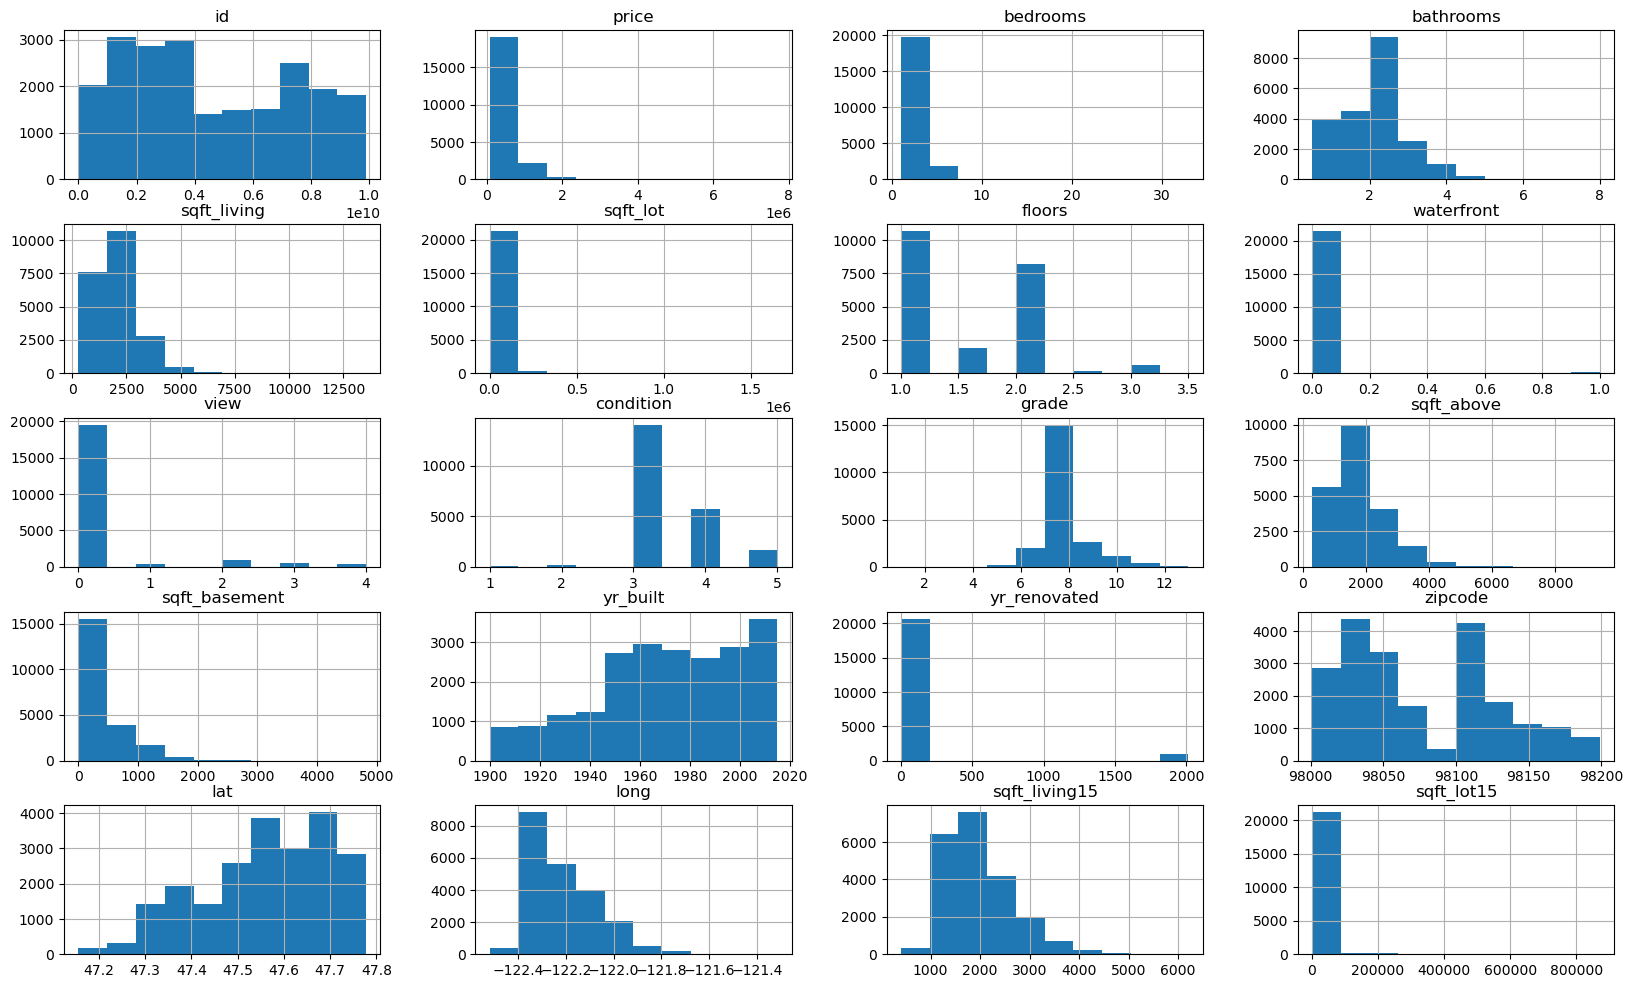

In [8]:
#Show distribution of values across the dataset 
df.hist(figsize=(20, 12))


**3. Cleaning Up and Updating the Data**
<br>
We can see some coloumns have differing entries count, which means some data are missing or inappropriate. Thus, I will be checking for any empty or inappropriate (non-numerical) entries in the data and adjusting them.
<br>


In [9]:
#Reporting total sum of empty/NaN (not-a-number) values for each coloumn
print('Number of empty/NaN enteries per coloumn:') 
df.isnull().sum()


Number of empty/NaN enteries per coloumn:


id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [10]:
#Now replacing null enteries with the mean value for the necessary coloumns
#calculate mean value for coloumn 'bedrooms'
mean_bedrooms = df['bedrooms'].mean()
#replacing null enteries with the mean value 
df['bedrooms'].replace(np.nan, mean_bedrooms, inplace=True)

#calculate mean value for coloumn 'bathrooms'
mean_bathrooms = df['bathrooms'].mean()
#replacing null enteries with mean value 
df['bathrooms'].replace(np.nan, mean_bathrooms, inplace=True)


#Previewing the coloumns that had null values again 
print("Number of null values for the column \'bedrooms\':", df['bedrooms'].isnull().sum())
print("Number of null values for the column \'bathrooms\':", df['bathrooms'].isnull().sum())


Number of null values for the column 'bedrooms': 0
Number of null values for the column 'bathrooms': 0


### Part Two: Data Preparation and Preprocessing
<br> 

<b>In this section, I will identify the subset of data to be used for building and evaluating the model and making the necessary adjustments to prepare them for use and analysis.</b>
<br>


**1. Identifying the Variables**
<br>
First, we want to identify the house attributes that best predict a house's price; these will be the features for our model, the features by which we will train the model to generate price predictions. One way of doing so is performing correlational analysis to identify and select the attributes that are most correlated with price.
<br>


In [11]:
#Checking the correlations between all variables in the dataset
correlations_table = df.corr()
correlations_table
      

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000,-0.017,0.001,0.005,-0.012,-0.132,0.019,-0.003,0.012,-0.024,0.008,-0.011,-0.005,0.021,-0.017,-0.008,-0.002,0.021,-0.003,-0.139
price,-0.017,1.000,0.309,0.526,0.702,0.090,0.257,0.266,0.397,0.036,0.667,0.606,0.324,0.054,0.126,-0.053,0.307,0.022,0.585,0.082
bedrooms,0.001,0.309,1.000,0.514,0.578,0.032,0.178,-0.007,0.080,0.027,0.357,0.479,0.303,0.156,0.018,-0.154,-0.010,0.131,0.393,0.030
bathrooms,0.005,0.526,0.514,1.000,0.755,0.088,0.502,0.064,0.188,-0.126,0.665,0.686,0.283,0.507,0.051,-0.205,0.024,0.225,0.569,0.088
sqft_living,-0.012,0.702,0.578,0.755,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.877,0.435,0.318,0.055,-0.199,0.053,0.240,0.756,0.183
sqft_lot,-0.132,0.090,0.032,0.088,0.173,1.000,-0.005,0.022,0.075,-0.009,0.114,0.184,0.015,0.053,0.008,-0.130,-0.086,0.230,0.145,0.719
floors,0.019,0.257,0.178,0.502,0.354,-0.005,1.000,0.024,0.029,-0.264,0.458,0.524,-0.246,0.489,0.006,-0.059,0.050,0.125,0.280,-0.011
waterfront,-0.003,0.266,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.017,0.083,0.072,0.081,-0.026,0.093,0.030,-0.014,-0.042,0.086,0.031
view,0.012,0.397,0.080,0.188,0.285,0.075,0.029,0.402,1.000,0.046,0.251,0.168,0.277,-0.053,0.104,0.085,0.006,-0.078,0.280,0.073
condition,-0.024,0.036,0.027,-0.126,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.145,-0.158,0.174,-0.361,-0.061,0.003,-0.015,-0.107,-0.093,-0.003


In [12]:
#Showing the correlations with house price only (from highest to lowest)
correlations_ByPrice = df.corr()['price'].sort_values(ascending=False)
correlations_ByPrice


price            1.000
sqft_living      0.702
grade            0.667
sqft_above       0.606
sqft_living15    0.585
bathrooms        0.526
view             0.397
sqft_basement    0.324
bedrooms         0.309
lat              0.307
waterfront       0.266
floors           0.257
yr_renovated     0.126
sqft_lot         0.090
sqft_lot15       0.082
yr_built         0.054
condition        0.036
long             0.022
id              -0.017
zipcode         -0.053
Name: price, dtype: float64

Based on correlational analysis, I'll use the top 10 variables most correlated with Price to develop and train the model; these are: 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', and 'waterfront'. <br>
These will be the independent or 'predictor' variables whilst house price will be the dependent or 'target' variable. The model will use the predictors to predict the target.
<br>


**Selecting the predictor and target variables**

In [13]:
#Now selecting the variables for training the model 
#specifying the independent/predictor variables
predictors = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 
        'sqft_basement', 'bedrooms', 'lat', 'waterfront']

#assigning the variables to 'x_data'
x_data = df[predictors]

#specifying the dependent/target variable and assigning it to 'y_data'
y_data = df['price']


**2. Data Splitting**
<br>
Now that we have our data, the next step is to split into a training set, for developing and training the model, and a testing set, for testing the model. Data splitting will allow us to accurately evaluate the model and estimate how likely it is to perform in the real world with novel datasets. As such, I will be preserving 75% of the dataset for training and 25% for testing. The testing set will not be used for any training so that it is considered to be novel, previously unseen data which we use to estimate how the model is likely to function in the real world, thus giving us an estimate of the model's generalization error. 
<br>


In [14]:
#Performing data splitting to obtain a training set (75%) and testing set (25%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.75, random_state=0)

#We can check the sizes of the training and testing sets
print('Number of training samples:', x_train.shape[0])    
print('Number of testing samples:', x_test.shape[0])


Number of training samples: 16209
Number of testing samples: 5404


**3. Feature Scaling: Standardizing the Scales**
<br>

Lastly, given that the variables being used have varying scales with values falling into vastly different ranges, some of which showing skewed distribution (see histogram graphs above), we need to ensure that this diversity of scales doesn't influence the analysis and/or the model predictions. One of the best ways to control for this issue is to standardize the scales such that the data would have the properties of a standard normal distribution. This means that the values from across the different variables will all fall into the same value range with a mean of 0 and a standard deviation of 1. 
<br>


In [15]:
#Standardizing the scales 
#Get a scaler object 
Scaler = StandardScaler()
#fitting and scaling the training set 
x_train = Scaler.fit_transform(x_train)  
#scaling the testing set 
x_test = Scaler.transform(x_test)


 *Now the data is ready for processing and model building...*

### Part Three: Model Development and Evaluation 

**In trying to develop and select the best model for the data, I will compare here two models: a linear regression model and a non-linear or polynomial regression one. Whilst the former looks at the linear relationship between the independent variables and the dependent variable, the latter examines a non-linear or curvilinear relationship between the predictors and target.  Thus, I will develop two models to assess which type of relationship is more appropriate for the data, the first is multiple linear regression model whilst the second is a multivariate polynomial  regression one, and accordingly select the model that is best fitted to the data. <br>
I will first train each model using the training set we obtained earlier and then assess it separately using the testing set, before using the model to generate predictions. To evaluate the performance of the models, I will the R-squared metric, also known as coefficient of determination, which will tell us how much of the variance in the dependent/target variable (price) is accounted for and explained by the model (i.e. the independent/predictor variables).**
<br><br>


#### MODEL ONE: MULTIPLE LINEAR REGRESSION MODEL 
<br>
A multiple linear regression model is a type of model that depicts the linear relationship between multiple independent or predictor variables and the dependent or target variable. It tries to capture and explain all the variance in the data via a linear function.
<br>


In [16]:
#Creating a regression object 
multireg_model = LinearRegression()

#Training the model with training data (i.e. fitting the model)
multireg_model.fit(x_train, y_train)

#Evaluating the model with the testing set using R-squared 
R2_test = multireg_model.score(x_test, y_test)
print(f'The R-squared score for the multiple regression model is: r2={round(R2_test,3)}')


The R-squared score for the multiple regression model is: r2=0.644


As indicated by the output, we can conclude that approximately 64% of the variance in house price is explained by the model, i.e. the house attributes selected.


Now that we have fitted the model, we can generate price predictions 

In [17]:
#Generating predictions using the testing set
Y_pred = multireg_model.predict(x_test) 

#We can compare the actual prices vs. predicted prices 
Actual_vs_Predicted = pd.concat([pd.Series(y_test.values), pd.Series(Y_pred)], axis=1, ignore_index=True).rename(columns={0:'Actual Prices', 1:'Predicted Prices'})
Actual_vs_Predicted['Actual Prices'] = Actual_vs_Predicted['Actual Prices'].apply(lambda price: '${:,.2f}'.format(price))
Actual_vs_Predicted['Predicted Prices'] = Actual_vs_Predicted['Predicted Prices'].apply(lambda price: '${:,.2f}'.format(price))

#Previewing the first 10 price comparisons 
Actual_vs_Predicted.head(10)


,Actual Prices,Predicted Prices
0,"$297,000.00","$483,512.81"
1,"$1,578,000.00","$1,390,213.10"
2,"$562,100.00","$469,294.88"
3,"$631,500.00","$463,164.22"
4,"$780,000.00","$1,082,358.68"
5,"$485,000.00","$461,257.02"
6,"$340,000.00","$311,981.57"
7,"$335,606.00","$438,062.19"
8,"$425,000.00","$601,306.92"
9,"$490,000.00","$1,294,538.81"


We can see from the price comparisons, some price predictions are close to the actual prices, some differ by quite a large margin. We can get the exact value for how much the predicted prices deviate from the actual prices on average by calculating the root mean squared error.


**Model Evaluation: Root Mean Squared Error**

In [18]:
#First, calculating the mean squared error (MSE)
MSE = mean_squared_error(y_test, Y_pred)

#Calculating the root MSE (RMSE)
RMSE = np.sqrt(MSE)
print(f'The root mean squared error is: RMSE={round(RMSE,3)}')


The root mean squared error is: RMSE=217566.824


The resulting RMSE score indicates that the predicted prices deviate from the actual prices by approximately $217,566 on average. We can do much better still. 


**Model Evaluation: Distribution Plot**

<br>
We can also visualize the discrepancy between the actual prices and the predicted prices using a distribution plot (based on kernel density estimation) to get better insight and understanding of where our model falls short.
<br>


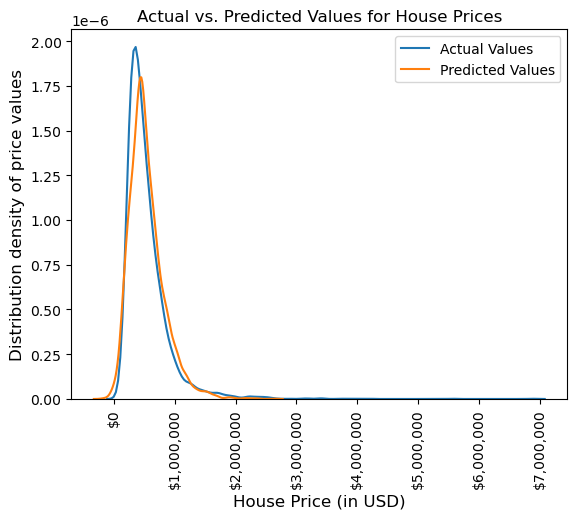

In [19]:
#Visualizing the distribution of actual vs. predicted prices 
#Creating the distribution plot 
ax1 = sns.distplot(y_test, hist=False, label='Actual Values')
sns.distplot(Y_pred, ax=ax1, hist=False, label='Predicted Values')
#Adding a title and labeling the axes
plt.title('Actual vs. Predicted Values for House Prices')
plt.xlabel('House Price (in USD)', fontsize=12)
plt.ylabel('Distribution density of price values', fontsize=12)
plt.legend(loc='best')
#Adjusting the x-axis to display the prices in a reader-friendly format
plt.gcf().axes[0].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.xticks(rotation=90)

#Displaying the distribution plot
plt.show()


As can be gathered from the plot, the model is able to track the actual house prices it's trying to predict fairly okay but only in the lower price ranges, and falls short completely with higher price ranges, especially with houses above $2.5 million. Thus, it seems that this model is quite underfitted to the data. Let's see how a non-linear/polynomial model would fit the data. 


#### MODEL TWO: Multivariate Polynomial Regression Model 
<br>
A polynomial regression model depicts a non-linear or 'curvilinear' relationship between the independent or predictor variables and the dependent or target variable. It tries to capture and explain the variance in the data via a non-linear function. Note however, polynomial models have different polynomial 'orders' or 'degrees'. These polynomial orders control the degree of 'curvature' of the regression line for the model; some models are too complex, fitting data with high or very high variance, and thus requiring higher polynomial orders to capture all the variance in the data; others are simple and take a small order to fit the data. The task here, thus, is to figure out just the optimal polynomial order for the model, particularly in reference to the testing set; after all we ultimately need to ensure that the model is performing well in the real world not just with our particular training set. <br>
As such, I will employ a loop as well as k-fold cross validation to iterate over different models and test out different polynomial orders in order to select the model with the most optimal order. I will use the training set for training each model and for cross validation, before estimating the model's final performance separately using the testing set. I will again use the r-squared metric to evaluate the models performances.
<br><br>

In [20]:
#First, specifying the polynomial orders to test out
poly_orders = [2,3,4,5]       #up to five polynomials 

#Now testing out different orders using cross validation to select the best 
cv_scores = {}
for order in poly_orders: 
    #creating polynomial features object
    poly_features = PolynomialFeatures(degree=order)
    #transforming predictor variables to polynomial features
    x_train_poly = poly_features.fit_transform(x_train)

    #creating a regression object
    polyreg_model = LinearRegression()

    #Now using 10-fold cross validation to determine the best polynomial order 
    r2_scores = cross_val_score(polyreg_model, x_train_poly, y_train, cv=10)
    
    #Retrieving mean R-squared score for a given polynomial order 
    cv_scores[order] = np.mean(r2_scores)


In [21]:
#Selecting the best polynomial order 
best_order, best_score = None, None  
for order,score in cv_scores.items():
    if best_score is None or best_score < score: 
        if score > 0:
            best_score = score
            best_order = order 

#Reporting the best model with the most optimal polynomial 
print(f'The best model for the data has a polynomial order of {best_order}, and R-squared score of: r2={round(best_score,3)}')


The best model for the data has a polynomial order of 2, and R-squared score of: r2=0.733


Based on the cross validation results, it seems the best polynomial order for the model is 2, corresponding to an r-squared score of about 0.73, which means that approximately 73% of the variance in house prices is explained and accounted for this model. This is much better than the score obtained earlier with the multiple linear regression model. Let's see how the model performs with the testing set to get the best estimate of how reliable the model is.  


**Model Testing**

Now having trained and validated the model, I will train the model again with the best polynomial order, 2, and generate predictions, before testing the model again using the testing set to get the best estimate of its performance in the real world.

In [22]:
#Creating a polynomial features object
poly_features = PolynomialFeatures(degree=best_order)
#transforming predictor variables to polynomial features
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)
#fitting the model 
polyreg_model = LinearRegression()
polyreg_model.fit(x_train_poly, y_train)

#Testing the model with the test set (using r-squared)
R2_test = polyreg_model.score(x_test_poly, y_test) 
print(f'The r-squared score for the testing set is: r2={round(R2_test,3)}')


The r-squared score for the testing set is: r2=0.733


Evaluating the model using the testing data producted identical results. The resulting r-squared score indicates that approximately 73% of the variance in house prices can be related back to and explained by the house attributes choosen as the predictors. Still much better than the 0.64 obtained with the linear model. Let's do further evaluations.


**Model Evaluation: Root Mean Squared Error**

In [23]:
#Generating predictions using both sets 
Y_pred_train = polyreg_model.predict(x_train_poly)
Y_pred_test = polyreg_model.predict(x_test_poly)
#Calculating root mean squared error for both sets to compare them
MSE_train = mean_squared_error(y_train, Y_pred_train) 
RMSE_train = np.sqrt(MSE_train)
MSE_test = mean_squared_error(y_test, Y_pred_test)
RMSE_test = np.sqrt(MSE_test)
print('RMSE for training set: {:,.3f}'.format(RMSE_train))
print('RMSE for testing set: {:,.3f}'.format(RMSE_test))


RMSE for training set: 183,534.011
RMSE for testing set: 188,428.897


We can see from the RMSE scores that the discrepancy between the predicted prices and the actual prices are quite similar for the in-sample training data and out-of-sample, testing data. This indicates that the model is producing reliable predictions. Further, for house prices that can range to millions, a difference of about $188,428 (RMSE for test set) is not unrealistic. We can visualize the discrepancy in prices again using a distribution plot.


**Model Evaluation: Distribution Plot**

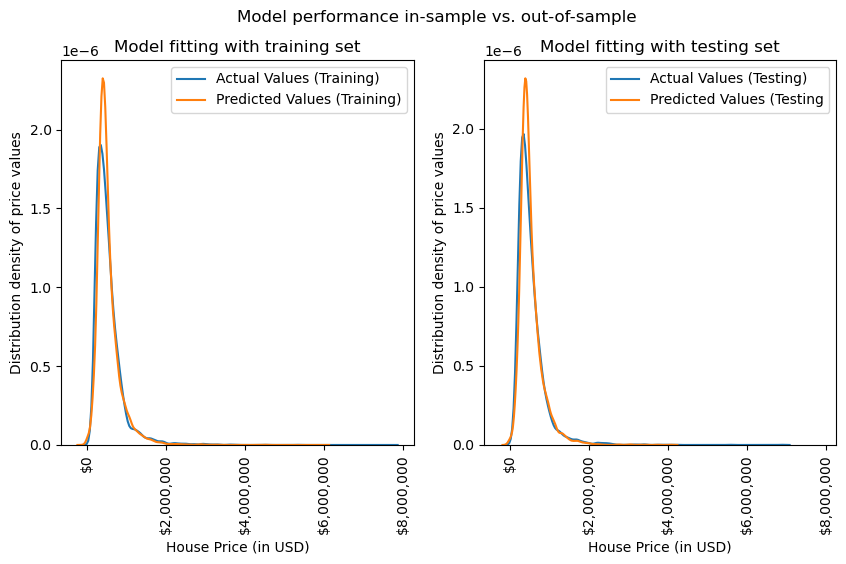

In [24]:
#Setting the characteristics of the plots 
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10, 5))
#Visualizing model fitting for the training set 
ax1 = sns.distplot(y_train, hist=False, ax=axes[0], label='Actual Values (Training)')
sns.distplot(Y_pred_train, hist=False, ax=ax1, label='Predicted Values (Training)')
#Visualizing model fitting for testing set 
ax2 = sns.distplot(y_test, hist=False, ax=axes[1], label='Actual Values (Testing)')
sns.distplot(Y_pred_test, hist=False, ax=ax2, label='Predicted Values (Testing')

#Adding titles and labeling the axes 
fig.suptitle('Model performance in-sample vs. out-of-sample')
axes[0].set_title('Model fitting with training set')
axes[0].set_xlabel('House Price (in USD)')
axes[0].set_ylabel('Distribution density of price values')
axes[0].legend(loc='best')
axes[1].set_title('Model fitting with testing set')
axes[1].set_xlabel('House Price (in USD)')
axes[1].set_ylabel('Distribution density of price values')
axes[1].legend(loc='best')
#Adjusting the x-axis to display the prices in a reader-friendly format
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.gcf().axes[0].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.gcf().axes[1].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

#show plot
plt.show()


The distribution densities look very similar for both sets. This indeed indicates that the the model is able to perform well in the real world as with the in-sample data. However, we can see from the graphs that the model seems to be over-predicting house prices in the low range (0 - ~\\$1,500,000), but isn't very reliable in predicting prices in the higher ranges, between \\$4,000,000 to \\$7,000,000. <br>

Let's see if we can improve the performance of the model even further. To do so, I will perform hyperparameter tuning, particularly L1 Regularization with Lasso regression. 


### Part Four: Hyperparameter Tuning 


To improve the model predictions further, I will perform L1 regularization using lasso regression. Lasso regression introduces a new hyperparameter to the model, 'alpha', which regularizes the coefficients by shrinking them. The coefficients are shrunk enough to optimize the model for better predictions across different data sets, which is done through cross validation. Thus, regularizing the coefficents will lead to better model performance in the real world with new datasets, thus decreasing the generalization error. Alpha can take different values to regularize the coefficients: the higher the alpha value, the more shrunk the coefficients are. One advantage of lasso regression is that tuning alpha appropriately allows us to optimize the model whilst avoiding both underfitting and overfitting simultaneously. <br>
Further, lasso regression can be particularly useful for controlling the potential problem of 'multicollinearity'. Multicollinearity arises when the predictor variables being used to train the model exhibit high correlations among themselves. This is evident from the correlations table presented above. Multicollinearity can potentially hinder the performance of the model. Lasso regression ensures that multicollinearity doesn't affect the model's prediction validity. We can take a second look at the correlations between the current predictors using a heatmap.
 

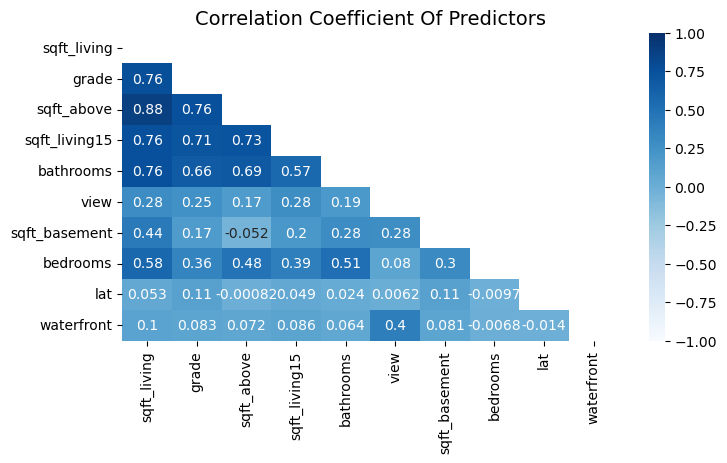

In [25]:
#Plotting a heatmap 
#Specifying the figure size 
plt.figure(figsize=(8,4))     
mask = np.triu(np.ones_like(df[predictors].corr(), dtype=bool))
sns.heatmap(df[predictors].corr(), annot=True, mask=mask, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors', fontsize=14)
plt.show()


We can see from the heatmap high correlations among multiple predictors. Particularly, the correlation coefficient is greater than 0.7 among each of the variables: house square foot, house grade, living room square foot with innovation, and house square foot without the basement, and between house square foot and number of bathrooms. Accordingly, we can suspect multicollinearity in the data. Performing lasso regression will eliminate this problem by reducing model complexity, making sure that the correlation between the predictors doesn't affect the model's reliability. 


**MODEL DEVELOPMENT: Polynomial Lasso Regression Model**
<br>

As mentioned, lasso regression can regularize coefficients using different alpha values. The task here is to find the most optimal value for alpha. To do so, I will apply a cross validation technique, 'grid search', which allows us to test out different values for the model's hyperparameters across different iterations and reports back the model that performed best along with the corresponding hyperparameter values. These will be the best hyperparameters. <br>
As such, I will use it to determine the best alpha value as well as the best polynomial order for this new model. Furthermore, to facilitate processing this time around, I will build a 'pipeline' which takes the data, performs polynomial transform, and fits a lasso regression model automatically without having to write the code for each step separately. I will again build the model and perform cross validation with the training data, before running a final test using the testing data. 
<br>

In [26]:
#Creating a pipeline to automate model development 
#Specifying the steps 
pipe_steps = [('Polynomial', PolynomialFeatures()),    #to perform a polynomial transform
                ('Model', Lasso())]      #to develop the lasso regression model      


#Creating the pipeline to build a lasso regression model with polynomial features 
lasso_model = Pipeline(pipe_steps)


#Grid Search 
#Now performing grid search to obtain the best polynomial order and alpha value
#specifying the hyperparameters to test out 
parameters = {'Polynomial__degree': [2,3,4,5],      #specifying the polynomials to test out
              'Model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}     #specifying the alpha values to test out

#Creating a grid object and specifying the cross-validation characteristics
Grid = GridSearchCV(lasso_model, parameters, scoring='r2', cv=10) 

#Fitting the model with the training data for cross validation 
Grid.fit(x_train, y_train)


#Reporting the results of the cross validation (best polynomial order, alpha, and r2 score)
best_order = Grid.best_params_['Polynomial__degree']
best_alpha = Grid.best_params_['Model__alpha']
best_r2 = Grid.best_score_
print(f'The best model has a polynomial order of {best_order}, alpha value of: alpha={best_alpha}, and r-squared score of r2={round(best_r2,3)}')


The best model has a polynomial order of 3, alpha value of: alpha=10000, and r-squared score of r2=0.74


Unlike what we saw earlier, before hyperparameter tuning, the best polynomial order for this model is 3. Further, the model performance as indicated by r-squared score, didn't decrease, remaining around 0.74, which means the model still accounts for about 74% of the variance   in house prices. Let's see how the final score will be on the out-of-sample, testing set.


**Model Testing**
<br>
Now we can test the model one final time using the testing set.


In [27]:
#First, extracting the model with the best parameters 
Lasso_Model = Grid.best_estimator_

#Calculating the R-squared score for the model using the testing set 
R2_test = Lasso_Model.score(x_test, y_test)
print(f'The r-squared score for the testing set is: r2={round(R2_test,3)}')


The r-squared score for the testing set is: r2=0.767


We can see here the resulting r-squared score (0.767) has improved! It proved to be even better on the out-of-sample test data. Our model now accounts for approximately 76% of the variance in house prices, i.e., 76% of the price variance can be related back to the predictor house attributes we developed the model with. Thus, the polynomial lasso regression model seems to be the best one so far, and likely the better performing one in the real world with novel datasets. We can again calculate the RMSE values to evaluate the model's predictions and visualize the its results to get a better insight into its strenghts and weaknesses. 


**Model Evaluation: Root Mean Squared Error** 


In [28]:
#Generating predictions using both sets 
Y_pred_train = Lasso_Model.predict(x_train)
Y_pred_test = Lasso_Model.predict(x_test)
#Calculating root mean squared error for both sets to compare them
MSE_train = mean_squared_error(y_train, Y_pred_train) 
RMSE_train = np.sqrt(MSE_train)
MSE_test = mean_squared_error(y_test, Y_pred_test)
RMSE_test = np.sqrt(MSE_test)
print('RMSE for training set: {:,.3f}'.format(RMSE_train))
print('RMSE for testing set: {:,.3f}'.format(RMSE_test))


RMSE for training set: 174,505.316
RMSE for testing set: 176,024.745


We can see here too that the RMSE values improved for both the in-sample training set and the out-of-sample testing set. The discrepancy between the predicted house prices and actual prices went down to an average of about $176,000, (on testing set) which, again, for house prices that can range to millions of dollars is a fairly good estimate. Let's look again at the distribution density of the predicted vs. actual prices.


**Model Evaluation: Distribution Plot**


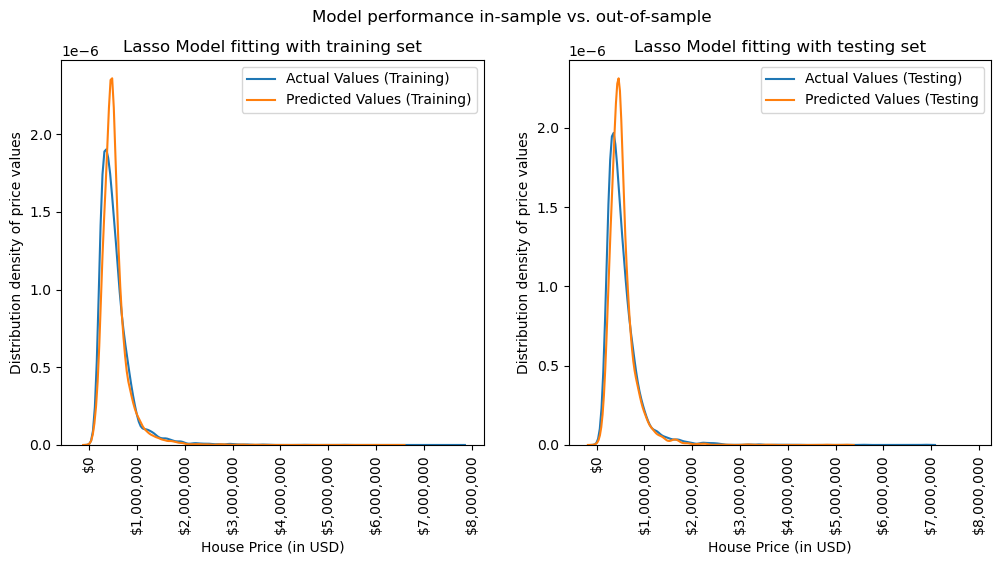

In [29]:
#Setting the characteristics of the plots 
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12, 5))
#Visualizing model fitting for the training set 
ax1 = sns.distplot(y_train, hist=False, ax=axes[0], label='Actual Values (Training)')
sns.distplot(Y_pred_train, hist=False, ax=ax1, label='Predicted Values (Training)')
#Visualizing model fitting for testing set 
ax2 = sns.distplot(y_test, hist=False, ax=axes[1], label='Actual Values (Testing)')
sns.distplot(Y_pred_test, hist=False, ax=ax2, label='Predicted Values (Testing')

#Adding titles and labeling the axes 
fig.suptitle('Model performance in-sample vs. out-of-sample')
axes[0].set_title('Lasso Model fitting with training set')
axes[0].set_xlabel('House Price (in USD)')
axes[0].set_ylabel('Distribution density of price values')
axes[0].legend(loc='best')
axes[1].set_title('Lasso Model fitting with testing set')
axes[1].set_xlabel('House Price (in USD)')
axes[1].set_ylabel('Distribution density of price values')
axes[1].legend(loc='best')
#Adjusting the x-axis to display the prices in a reader-friendly format
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.gcf().axes[0].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.gcf().axes[1].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

#show plot
plt.show()


Indeed, the performance of the model in-sample and out-of-sample is quite similar and more improved. We can see from the graph on the left that the model is now better able to track and produce accurate predictions in the higher price ranges (\\$4,000,000 - ~\\$5,500,000), which wasn't the case earlier before hyperparameter tuning. 


Thus, we can conclude that the polynomial lasso regression model is the best model for our house sales dataset. We can also now develop the final model with the whole data set, give it the optimal parameters as obtained from the previous evaluations, and use the model to perform predictive pricing, generate novel predictions from new data.
<br>

### Part Five: Model Prediction


For this section, I will create a custom function that takes a set of data comprised of different house characteristics, and based on it the final model will be used to produce a price prediction that best suits each set of characteristics. But first, I will develop the final model again with the whole dataset, before using it to generate predictions. Again, to automate the process of model building and training, I will create a pipeline. The pipeline will take the data and (i) standardize the predictors' scales; (ii) perform polynomial transform (with a polynomial order of 3) on the predictors to turn them into polynomial features; and lastly, (iii) build a polynomial lasso regression model (setting alpha at 10000) with the standardized and transformed data. 


In [30]:
#Specifying the pipeline process 
pipeline_steps = [('Scaler', StandardScaler()), 
                 ('Polynomial', PolynomialFeatures(degree=3)),
                 ('Model', Lasso(alpha=10000))]

#Building the pipeline for the lasso regression model 
Model = Pipeline(pipeline_steps)

#Fitting the model with the entire dataset 
Model.fit(x_data, y_data)


Pipeline(steps=[('Scaler', StandardScaler()),
                ('Polynomial', PolynomialFeatures(degree=3)),
                ('Model', Lasso(alpha=10000))])

*We are now reading to use the model to generate predictions..*

**Generating Predictions**

Now I will create a custom function, MakePredictions(), that takes novel data of different house characteristics and uses the model to generate predictions that best suit the new house characteristics passed to the function. 

In [31]:
#Defining the function 
def MakePrediction(model, X_vars): 
    """This function takes two inputs: 'model', which specifies the model to be used to generate the price predictions, 
    and 'X_vars', which specifies the house characteristics for each house to make the price prediction based on. It 
    runs the prediction-making process and returns a table with the predicted prices for each house."""

    Y_pred = model.predict(X_vars)
    Y_pred_df = pd.Series(Y_pred, name='Predicted Prices').to_frame().apply(lambda series: series.apply(lambda price: '${:,.2f}'.format(price)))
    return Y_pred_df 


To test the function I will extract a random sample from the original dataset given that there's no new data available. Thus, I will create here a new dataframe with a sample of 20 data points taken at random from the original dataframe, and then pass them to the MakePrediction() function along with the final model developed, to generate novel price predictions based on these characteristics. 


In [32]:
#Extracting a random sample from the data and assigning it to 'X_new'
X_new = x_data.sample(20)        #number of samples = 20  

#Previewing the sample 
X_new

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront
5118,2300,7,1650,2300,2.500,3,650,4.000,47.413,0
15394,2460,8,2460,2760,1.750,0,0,4.000,47.726,0
789,1800,7,1800,1800,2.500,0,0,3.000,47.529,0
12119,2180,8,1480,2180,1.750,0,700,3.000,47.759,0
19071,1800,7,1320,1890,2.750,0,480,3.000,47.568,0
1453,1330,5,1330,1150,2.000,0,0,4.000,47.496,0
7710,3920,9,2900,2540,4.250,0,1020,5.000,47.587,0
11598,4170,11,4170,4560,3.500,0,0,4.000,47.528,0
5215,1990,7,1340,1750,2.750,0,650,3.000,47.743,0
11337,1170,7,1170,1180,1.750,0,0,3.000,47.368,0


In [33]:
#Now using the custom function to generate price predictions from the sample, X_new 
MakePrediction(Model, X_new)


,Predicted Prices
0,"$482,473.99"
1,"$618,138.86"
2,"$457,170.59"
3,"$518,713.89"
4,"$490,163.24"
5,"$291,892.08"
6,"$989,396.43"
7,"$1,170,895.82"
8,"$472,381.58"
9,"$213,971.22"


In [34]:
#Showing the house characteristics and the corresponding predicted prices together
sample_and_prediction, sample_and_prediction['Predicted Prices'] = X_new.reset_index(drop=True), MakePrediction(Model, X_new)
sample_and_prediction

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,Predicted Prices
0,2300,7,1650,2300,2.500,3,650,4.000,47.413,0,"$482,473.99"
1,2460,8,2460,2760,1.750,0,0,4.000,47.726,0,"$618,138.86"
2,1800,7,1800,1800,2.500,0,0,3.000,47.529,0,"$457,170.59"
3,2180,8,1480,2180,1.750,0,700,3.000,47.759,0,"$518,713.89"
4,1800,7,1320,1890,2.750,0,480,3.000,47.568,0,"$490,163.24"
5,1330,5,1330,1150,2.000,0,0,4.000,47.496,0,"$291,892.08"
6,3920,9,2900,2540,4.250,0,1020,5.000,47.587,0,"$989,396.43"
7,4170,11,4170,4560,3.500,0,0,4.000,47.528,0,"$1,170,895.82"
8,1990,7,1340,1750,2.750,0,650,3.000,47.743,0,"$472,381.58"
9,1170,7,1170,1180,1.750,0,0,3.000,47.368,0,"$213,971.22"


In [35]:
#END